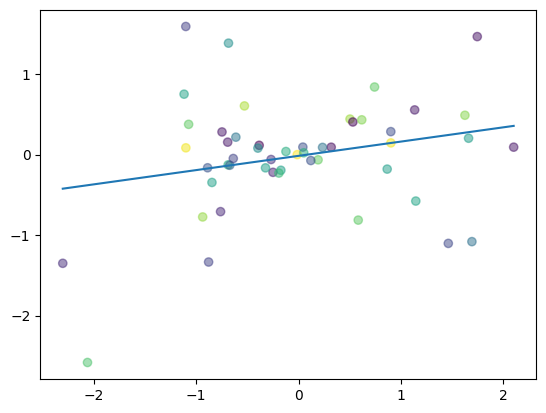

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creates 50 random x and y numbers
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

# Makes the dots colorful
colors = np.random.rand(n)

# Plots best-fit line via polyfit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Plots the random x and y data points we created
# Interestingly, alpha makes it more aesthetically pleasing
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [1]:
x_values = [i for i in range(11)]

x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [5]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [6]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [7]:
y_values = [2*i + 1 for i in x_values]

y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [8]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [9]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [10]:
import torch
import torch.nn as nn

In [11]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [12]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [13]:
criterion = nn.MSELoss()

In [14]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
epochs = 100

for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 1.5593505653388462e-11
epoch 2, loss 1.5593505653388462e-11
epoch 3, loss 1.5593505653388462e-11
epoch 4, loss 1.5593505653388462e-11
epoch 5, loss 1.5593505653388462e-11
epoch 6, loss 1.5593505653388462e-11
epoch 7, loss 1.5593505653388462e-11
epoch 8, loss 1.5593505653388462e-11
epoch 9, loss 1.5593505653388462e-11
epoch 10, loss 1.5593505653388462e-11
epoch 11, loss 1.5593505653388462e-11
epoch 12, loss 1.5593505653388462e-11
epoch 13, loss 1.5593505653388462e-11
epoch 14, loss 1.5593505653388462e-11
epoch 15, loss 1.5593505653388462e-11
epoch 16, loss 1.5593505653388462e-11
epoch 17, loss 1.5593505653388462e-11
epoch 18, loss 1.5593505653388462e-11
epoch 19, loss 1.5593505653388462e-11
epoch 20, loss 1.5593505653388462e-11
epoch 21, loss 1.5593505653388462e-11
epoch 22, loss 1.5593505653388462e-11
epoch 23, loss 1.5593505653388462e-11
epoch 24, loss 1.5593505653388462e-11
epoch 25, loss 1.5593505653388462e-11
epoch 26, loss 1.5593505653388462e-11
epoch 27, loss 1.5593

In [18]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.99999267],
       [ 2.9999938 ],
       [ 4.999995  ],
       [ 6.9999967 ],
       [ 8.999997  ],
       [10.999998  ],
       [13.        ],
       [15.000001  ],
       [17.000002  ],
       [19.000004  ],
       [21.000004  ]], dtype=float32)

In [19]:
# y = 2x + 1 
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

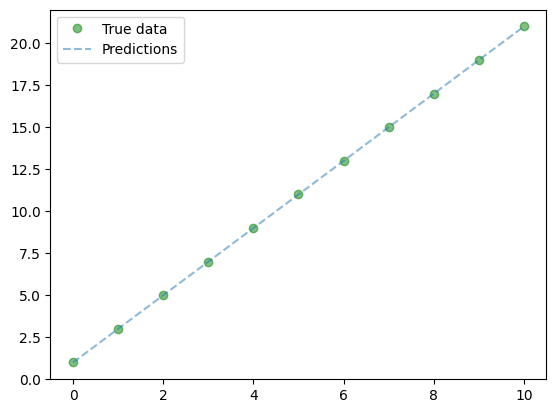

In [20]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [21]:
import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable

    #######################
    #  USE GPU FOR MODEL  #
    #######################
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 284.3841857910156
epoch 2, loss 23.35129737854004
epoch 3, loss 2.0579373836517334
epoch 4, loss 0.3193937838077545
epoch 5, loss 0.17589426040649414
epoch 6, loss 0.1625160425901413
epoch 7, loss 0.15977026522159576
epoch 8, loss 0.1579103022813797
epoch 9, loss 0.15614068508148193
epoch 10, loss 0.15439650416374207
epoch 11, loss 0.15267252922058105
epoch 12, loss 0.1509675234556198
epoch 13, loss 0.14928174018859863
epoch 14, loss 0.14761467278003693
epoch 15, loss 0.14596624672412872
epoch 16, loss 0.1443362981081009
epoch 17, loss 0.14272460341453552
epoch 18, loss 0.14113080501556396
epoch 19, loss 0.1395546942949295
epoch 20, loss 0.13799633085727692
epoch 21, loss 0.13645553588867188
epoch 22, loss 0.13493163883686066
epoch 23, loss 0.13342486321926117
epoch 24, loss 0.13193494081497192
epoch 25, loss 0.13046161830425262
epoch 26, loss 0.1290048062801361
epoch 27, loss 0.12756426632404327
epoch 28, loss 0.12613967061042786
epoch 29, loss 0.12473113089799881
epoch 